# Code

**Name - Unzela Inamdar**

**Class - IS 1**

**Roll Number - 2173180**

**Enrollment Number - MITU17BTCS0082**

**SUBJECT: Machine Leanring 2**


---

**EXPERIMENT #6** 

---


#**TITLE : ML LAB ASSIGNMENT 6**

---

In [ ]:
!pip install tensorflow-gpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Folders for Model and Training History
os.makedirs("drive/My Drive/Models3",exist_ok=True)
os.makedirs("drive/My Drive/Logs3",exist_ok=True)

path_to_model="drive/My Drive/Models3"
path_to_logs = "drive/My Drive/Logs3"

# Task List
* CNN for Cats vs Dogs
* Compare results by using different Pretrained Model


 # Load the dataset into colab

In [ ]:
!cp '/content/drive/My Drive/Copy of CatvsDogs.rar' '/content'

In [ ]:
#https://stackoverflow.com/questions/50315989/how-to-extract-rar-files-inside-google-colab
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/Copy of CatvsDogs.rar').extractall('/content')

# Libraries

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D ,Flatten , BatchNormalization, Dropout ,GlobalAveragePooling2D

# Distribution of dataset

In [ ]:
print("No of Images in Train folder "+str(len(glob.glob('/content/train/*.jpg'))))
print("No of Images in Test folder "+str(len(glob.glob('/content/test1/*.jpg'))))

No of Images in Train folder 25000
No of Images in Test folder 12500


In [ ]:
print("No of DOGS Images in Train folder "+str(len([x for x in glob.glob('/content/train/*.jpg') if 'dog' in x.split("/")[-1] ])))
print("No of CATS Images in Train folder "+str(len([x for x in glob.glob('/content/train/*.jpg') if 'cat' in x.split("/")[-1] ])))

No of DOGS Images in Train folder 12500
No of CATS Images in Train folder 12500


# View the data

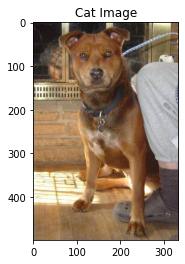

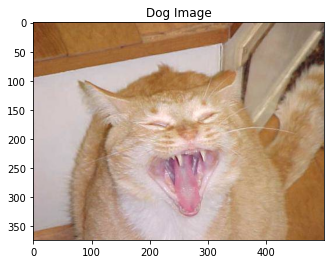

In [ ]:
img_path_cat  = glob.glob('/content/train/*.jpg')[-2]
img_path_dog  = glob.glob('/content/train/*.jpg')[2]
cat_img = cv2.cvtColor(cv2.imread(img_path_cat),cv2.COLOR_BGR2RGB) 
dog_img  =cv2.cvtColor(cv2.imread(img_path_dog),cv2.COLOR_BGR2RGB)
plt.imshow(cat_img)
plt.title("Cat Image")
plt.show()
plt.imshow(dog_img)
plt.title("Dog Image")
plt.show()

# Image AUgmentation and loading

## Load names n categories

In [ ]:
dataset = pd.DataFrame()

filename,category = [] , []

for path in glob.glob("/content/train/*.jpg"):
  name = path.split("/")[-1]
  if 'dog' in name:
    c = "1"
  elif 'cat' in name:
    c = "0"
  else:
    print("somehing wrong")
    continue
  filename.append(name)
  category.append(c)
dataset.insert(0,"filename",filename,)
dataset.insert(1,"class",category)

In [ ]:
dataset.head()

,filename,class
0,cat.10655.jpg,0
1,dog.5465.jpg,1
2,cat.11622.jpg,0
3,dog.5218.jpg,1
4,dog.2268.jpg,1


## Split Dataset in train and test

In [ ]:
sr = 0.3
train_df  =  dataset.sample(frac=1-sr)
test_df  = dataset.drop(train_df.index, axis=0)
print(f"No of samples in train and test are {train_df.size} and {test_df.size} respectively")

No of samples in train and test are 35000 and 15000 respectively


## Image augmentation

In [ ]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
train_gen = train_data_gen.flow_from_dataframe(dataframe=train_df,directory='/content/train',xcol='filename',ycol='class',target_size=(64,64),batch_size=32,class_mode='categorical')

valid_data_gen =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = valid_data_gen.flow_from_dataframe(dataframe=test_df,directory='/content/train',xcol='filename',ycol='class',target_size=(64,64),batch_size=32,class_mode='categorical',random=False)


Found 17500 validated image filenames belonging to 2 classes.
Found 7500 validated image filenames belonging to 2 classes.


# CNN with regularization

# Set Constants


In [ ]:
input_shape = (64,64,3)
activation_h = tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy()
epochs =15

# Model build
* VGG16
* Inception V3
* Mobilenet V2

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model =VGG16(weights = 'imagenet', include_top = False)
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation=activation_h)(x)
predictions = Dense(2, activation = activation_o)(x)
model_vgg16 = Model(inputs = model.input, outputs = predictions)

for layer in model.layers:
  layer.trainable = False
model_vgg16.compile(optimizer = optimizer,loss = loss,metrics = ['accuracy'])

In [ ]:
model =ResNet50(weights = 'imagenet', include_top = False)
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation=activation_h)(x)
predictions = Dense(2, activation = activation_o)(x)
model_rn50 = Model(inputs = model.input, outputs = predictions)

for layer in model.layers:
  layer.trainable = False
model_rn50.compile(optimizer = optimizer,loss = loss,metrics = ['accuracy'])

In [ ]:
model =InceptionV3(weights = 'imagenet', include_top = False)
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation=activation_h)(x)
predictions = Dense(2, activation = activation_o)(x)
model_iv3 = Model(inputs = model.input, outputs = predictions)

for layer in model.layers:
  layer.trainable = False
model_iv3.compile(optimizer = optimizer,loss = loss,metrics = ['accuracy'])

In [ ]:
model =MobileNetV2(weights = 'imagenet', include_top = False)
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation=activation_h)(x)
predictions = Dense(2, activation = activation_o)(x)
model_mnv2 = Model(inputs = model.input, outputs = predictions)

for layer in model.layers:
  layer.trainable = False
model_mnv2.compile(optimizer = optimizer,loss = loss,metrics = ['accuracy'])

In [ ]:
models=[model_vgg16,model_rn50,model_iv3,model_mnv2]
names = ['VGG_16','Resnet_50','Inception_V3','Mobilenet_V2']

In [ ]:
models=[model_mnv2]
names = ['Mobilenet_V2']

# Training

In [ ]:
for model , model_name in zip(models,names):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,)
  checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f'{path_to_model}/{model_name}.h5',monitor='val_accuracy',save_best_only=True)
  csv= tf.keras.callbacks.CSVLogger(f'{path_to_logs}/{model_name}.csv')
  model.fit_generator(train_gen,epochs=epochs,validation_data=valid_gen,callbacks=[early_stopping,checkpointer,csv])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
547/547 [==============================] - 92s 168ms/step - loss: 0.4880 - accuracy: 0.7707 - val_loss: 0.3881 - val_accuracy: 0.8209
Epoch 2/15
547/547 [==============================] - 92s 168ms/step - loss: 0.4148 - accuracy: 0.8003 - val_loss: 0.3728 - val_accuracy: 0.8268
Epoch 3/15
547/547 [==============================] - 90s 164ms/step - loss: 0.4050 - accuracy: 0.8087 - val_loss: 0.3758 - val_accuracy: 0.8281
Epoch 4/15
547/547 [==============================] - 87s 160ms/step - loss: 0.3987 - accuracy: 0.8140 - val_loss: 0.3661 - val_accuracy: 0.8377
Epoch 5/15
547/547 [==============================] - 86s 157ms/step - loss: 0.3801 - accuracy: 0.8213 - val_loss: 0.3839 - val_accuracy: 0.8300
Epoch 6/15
547/547 [==============================] - 88s 161ms/step - loss: 0.3797 - accuracy: 0.8238 - val_loss: 0.3680 - val_accuracy: 0.8289
Epoch 7/15
547/547 [==============================] - 

# Evaluation Comparizon

In [ ]:
import glob
import tensorflow as tf

## Load All models and logs

In [ ]:
models =  [ tf.keras.models.load_model(x) for x in glob.glob('/content/drive/My Drive/Models3/*.h5')]
logs =  [ pd.read_csv(x) for x in glob.glob('/content/drive/My Drive/Logs3/*.csv')]
names = [x.split('/')[-1].split(".")[0] for x in glob.glob('/content/drive/My Drive/Logs3/*.csv')]

## Graphical Representaion

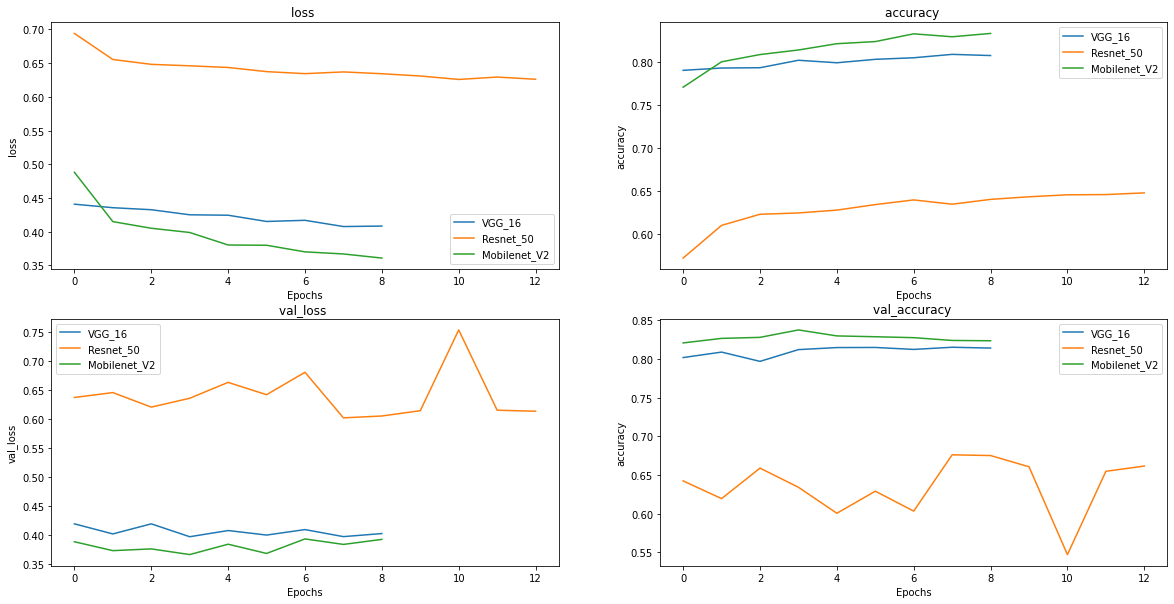

In [ ]:

fig, axs = plt.subplots(2,2,figsize=(20,10))

atr = 'loss'

for j in range(len(logs)):
  axs[0,0].plot(logs[j][atr],label=f'{names[j]}')

axs[0,0].set_title(f'{atr} ')
axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel(f"{atr}")
axs[0,0].legend(loc="best")

atr2='accuracy'
for j in range(len(logs)):
  axs[0,1].plot(logs[j][atr2],label=f'{names[j]}')

axs[0,1].set_title(f'{atr2} ')
axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel(f"{atr2}")
axs[0,1].legend(loc="best")

atr3 = 'val_loss'
for j in range(len(logs)):
  axs[1,0].plot(logs[j][atr3],label=f'{names[j]}')

axs[1,0].set_title(f'{atr3} ')
axs[1,0].set_xlabel("Epochs")
axs[1,0].set_ylabel(f"{atr3}")
axs[1,0].legend(loc="best")

atr4='val_accuracy'
for j in range(len(logs)):
  axs[1,1].plot(logs[j][atr4],label=f'{names[j]}')

axs[1,1].set_title(f'{atr4} ')
axs[1,1].set_xlabel("Epochs")
axs[1,1].set_ylabel(f"{atr2}")
axs[1,1].legend(loc="best")


## Accuracy & Loss

In [ ]:
for model , name in zip(models,names):
  loss_t, accuracy_t  = model.evaluate_generator(train_gen,verbose=0)
  loss_v, accuracy_v  = model.evaluate_generator(valid_gen,verbose=0)
  print(f"Training accuracy CNN {name} :{round(accuracy_t*100,4)} %")
  print(f"Training Loss CNN {name} :{loss_t}")
  print(f"Test accuracy CNN  {name}:{round(accuracy_v*100,4)} %")
  print(f"Test Loss CNN {name}:{loss_v}")


Instructions for updating:
Please use Model.evaluate, which supports generators.
Training accuracy CNN VGG_16 :81.0686 %
Training Loss CNN VGG_16 :0.4045311510562897
Test accuracy CNN  VGG_16:83.2 %
Test Loss CNN VGG_16:0.373629093170166
Training accuracy CNN Resnet_50 :60.8171 %
Training Loss CNN Resnet_50 :0.653139591217041
Test accuracy CNN  Resnet_50:66.6533 %
Test Loss CNN Resnet_50:0.6068800687789917
Training accuracy CNN Mobilenet_V2 :83.16 %
Training Loss CNN Mobilenet_V2 :0.3675214648246765
Test accuracy CNN  Mobilenet_V2:83.7733 %
Test Loss CNN Mobilenet_V2:0.36607983708381653


## Compare Classification Report

Cnn VGG_16 Classification report
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      3713
           1       0.50      0.50      0.50      3787

    accuracy                           0.50      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.50      0.50      0.50      7500



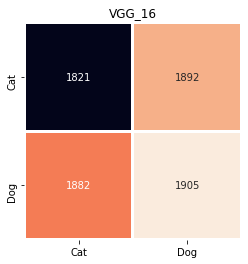

Cnn Resnet_50 Classification report
              precision    recall  f1-score   support

           0       0.49      0.56      0.52      3713
           1       0.50      0.42      0.46      3787

    accuracy                           0.49      7500
   macro avg       0.49      0.49      0.49      7500
weighted avg       0.49      0.49      0.49      7500



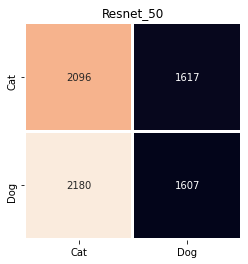

Cnn Mobilenet_V2 Classification report
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      3713
           1       0.50      0.51      0.50      3787

    accuracy                           0.50      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.50      0.50      0.50      7500



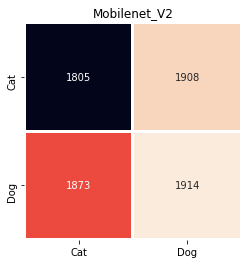

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
for model , name in zip(models,names):
  p=model.predict_generator(valid_gen)
  p = [np.argmax(x) for x in p]
  print(f"Cnn {name} Classification report")
  print(classification_report(valid_gen.classes,p))
  labels =  ['Cat','Dog']
  cm=confusion_matrix(valid_gen.classes,p)
  sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)
  plt.title(f"{name}")
  plt.show()


 # ANALYSIS
We observe that using a less complex model here, which is Pre-trained MobileNet v2, fits the data well and outputs less loss n more accuracy as compared to ResNet-50 , VGG16
# CONCLUSION
After doing this experiment we learn how to use various Pre-trained deep learning model and train them on a custom dataset
